In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

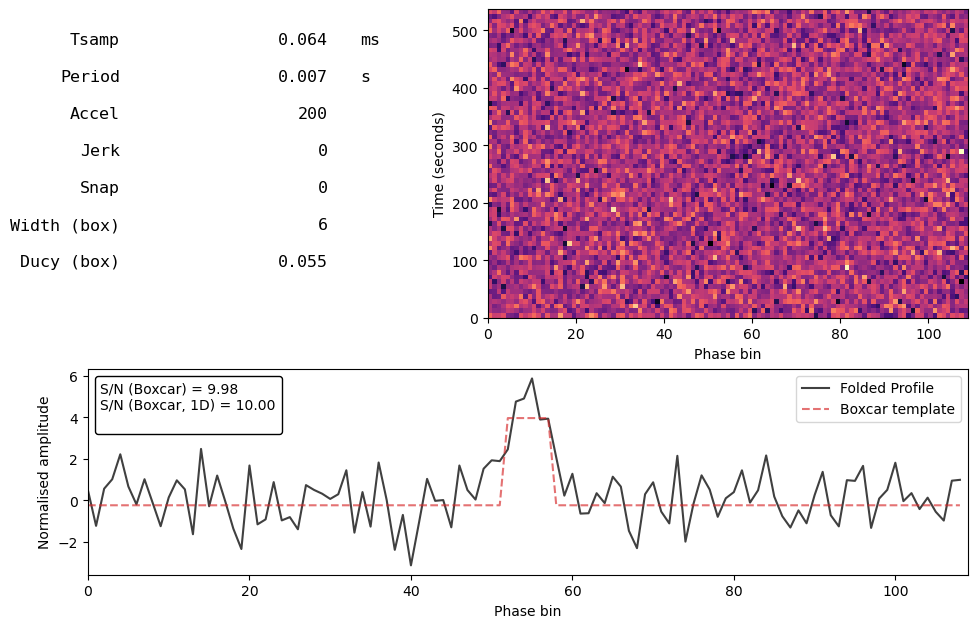

In [2]:
pulsar_period = 0.007
dt = 64e-6
accel = 200
nsamps = 2**23
mod_kwargs = {"acc": accel}
cfg = PulseSignalConfig(
    period=pulsar_period,
    dt=dt,
    nsamps=nsamps,
    snr=10,
    ducy=0.1,
    mod_kwargs=mod_kwargs,
)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
eta = 1
nbins = 64
p = ParamLimits.from_upper([accel, cfg.freq], (-accel * 5, accel * 5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 16384
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=p.limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    nthreads=8,
    use_fourier=False,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

Param limits: [[-1000.          1000.        ]
 [  142.72922796   142.98505776]]
[2026-02-18 18:31:38.407] [info] P-FFA [16384, 1, 1, 2, 64] -> [1, 1099, 4395, 2, 64]
[2026-02-18 18:31:38.407] [info] FFA Memory Usage: 4.61 GB + 0.08 GB (coords)


In [4]:
true_values = {"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq}
print(pgram.get_indices_summary(true_values=true_values))
print(pgram.get_summary())

True param indices: (659, 2197)
Best param indices: (np.int64(659), np.int64(2195), np.int64(3))
Best S/N: 9.31
Best Period: 0.007000005703216749
Best accel: 200.0
Best freq: 142.85702646505914
Best width: 4


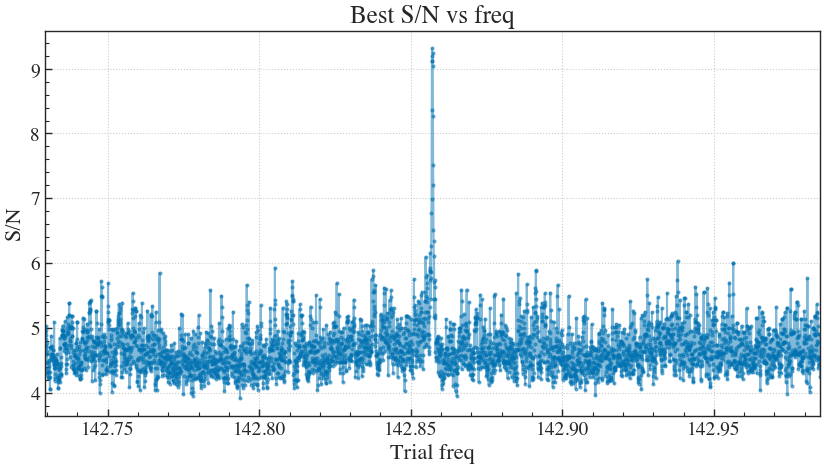

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

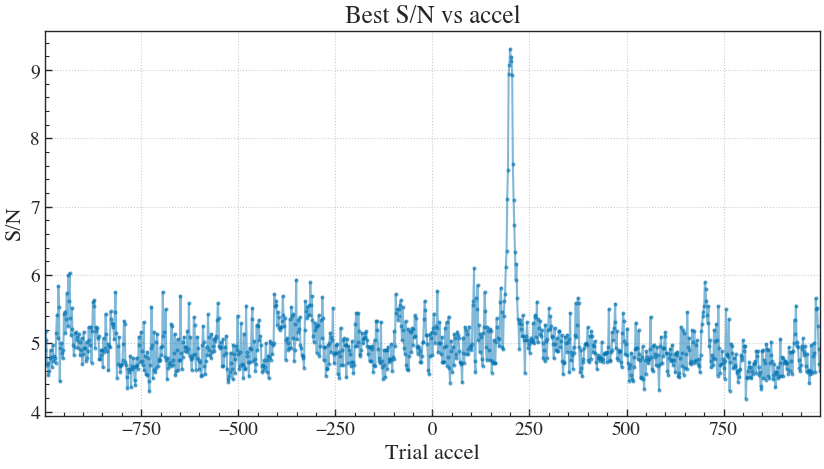

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

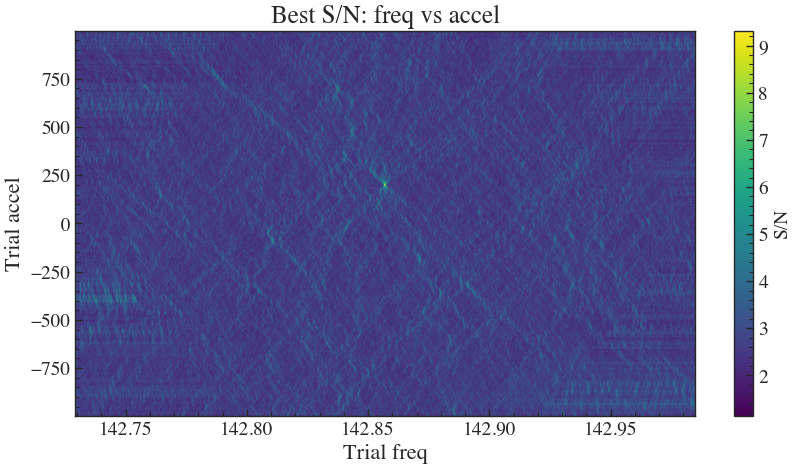

In [7]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

### FFT-SHIFT Search

In [8]:
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=p.limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    nthreads=8,
    use_fourier=True,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2026-02-18 18:31:40.217] [info] P-FFA [16384, 1, 1, 2, 33] -> [1, 1099, 4395, 2, 33]
[2026-02-18 18:31:40.217] [info] FFA Memory Usage: 4.75 GB + 0.08 GB (coords)


In [9]:
true_values = {"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq}
print(pgram.get_indices_summary(true_values=true_values))
print(pgram.get_summary())

True param indices: (659, 2197)
Best param indices: (np.int64(660), np.int64(2197), np.int64(4))
Best S/N: 9.98
Best Period: 0.007
Best accel: 201.8181818181818
Best freq: 142.85714285714286
Best width: 6


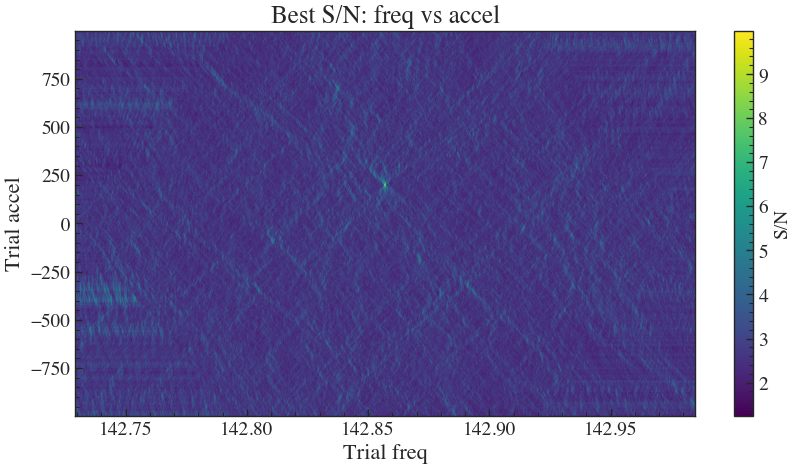

In [10]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()